In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [18]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])

    if abs(av_val - img[point]) <= T:
        return True

    return False

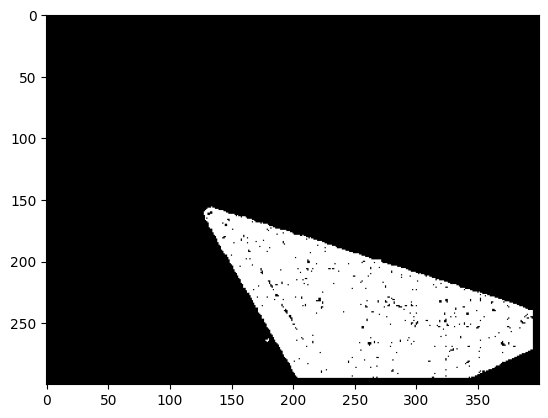

In [6]:
def region_growing(image, seed_point, homo_fun, r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r, image.shape[0] - r):
            for j in range(r, image.shape[1] - r):
                if mask[i, j] == 0 and mask[i - r:i + r, j - r: j + r].sum() > 0:
                    if homo_fun(image, mask, (i, j), T):
                        local_mask[i, j] = 1
        count = np.count_nonzero(local_mask)
        mask += local_mask

    return mask * 255


seed_point = (250, 250)
mask = region_growing(image_gray, seed_point, homo_average, 5, 20)

plt.imshow(mask, cmap="gray")
plt.show()

# Реализуйте вычисление критерия однородности, отличного от представленного.

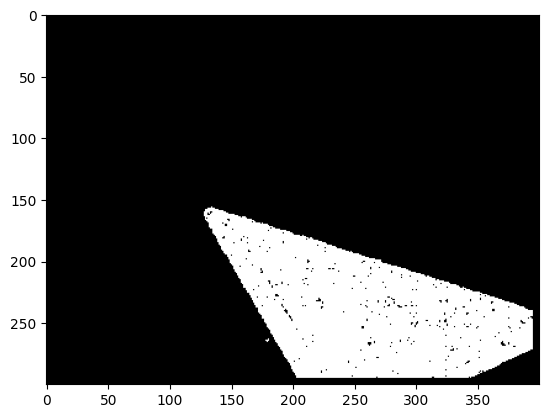

In [8]:
def homo_median(img, mask, point, T):
    region_vals = img[mask > 0]

    med_val = np.median(region_vals)

    return abs(med_val - img[point]) <= T


seed_point = (250, 250)
mask = region_growing(image_gray, seed_point, homo_median, 5, 20)

plt.imshow(mask, cmap="gray")
plt.show()

# Применить алгоритм сегментации watershed+distance transform для задачи подсчета пальмовых деревьев

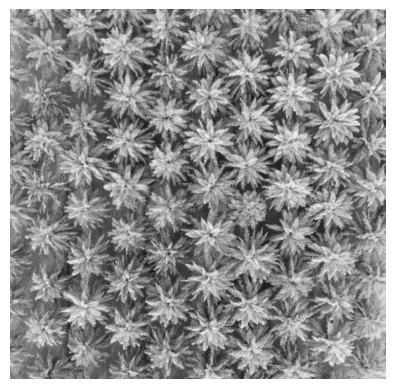

In [15]:
image_palm = cv2.imread('palm_1.JPG')
image_palm_gray = cv2.imread('palm_1.JPG', cv2.IMREAD_GRAYSCALE)

plt.imshow(image_palm_gray, cmap='gray')
plt.axis('off')
plt.show()

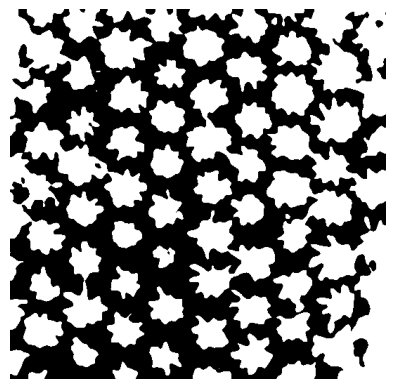

In [10]:
blur = cv2.GaussianBlur(image_palm_gray, (21, 21), 0)
ret, thresh = cv2.threshold(blur,0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

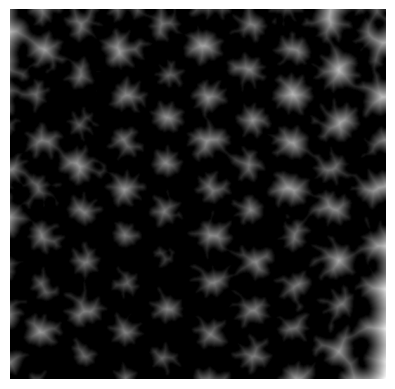

In [11]:
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
plt.imshow(dist, cmap='gray')
plt.axis('off')
plt.show()

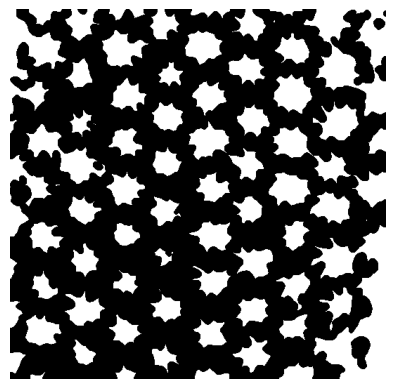

In [12]:
ret, sure_fg = cv2.threshold(dist, 0.1 * dist.max(), 255, cv2.THRESH_BINARY)
plt.imshow(sure_fg, cmap='gray')
plt.axis('off')
plt.show()

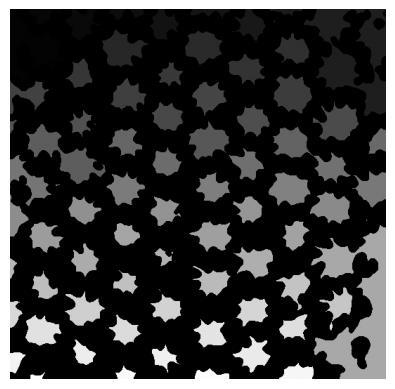

In [13]:
sure_fg = sure_fg.astype(np.uint8)
ret, markers = cv2.connectedComponents(sure_fg)
plt.imshow(markers, cmap='gray')
plt.axis('off')
plt.show()

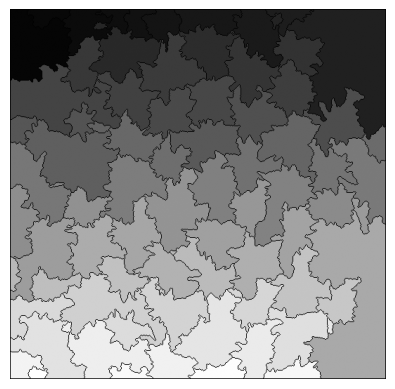

In [16]:
markers = cv2.watershed(image_palm, markers)
plt.imshow(markers, cmap='gray')
plt.axis('off')
plt.show()

In [17]:
num_palms = len(np.unique(markers)) - 1
print('Количество пальм:', num_palms)

Количество пальм: 84
